In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('dataframe/champions.csv')  
df.head(5)  

,idPartido,Temporada,Ronda,Local,Visitante,Evento,Arbitro,GolesLocal,GolesVisitante,VictoriaLocal,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,1,2022-01-01,Group stage,235,11,Stadion Maksimir,István Kovács,1,0,1,...,18.743616,40.00,60.00,20.00,20.00,0.40,0.60,1.60,685.188968,26.353422
1,2,2022-01-01,Group stage,14,153,Signal Iduna Park,François Letexier,3,0,1,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.33,356.128703,14.245148
2,3,2022-01-01,Group stage,15,1,Celtic Park,Sandro Schärer,0,3,0,...,18.490575,50.00,83.33,16.67,0.00,0.50,0.83,2.17,796.271706,36.194168
3,4,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,Andreas Ekberg,2,0,1,...,28.153728,0.00,33.33,0.00,66.67,0.00,0.33,1.33,382.737487,19.136874
4,5,2022-01-01,Group stage,184,2,Red Bull Arena,Srđan Jovanović,1,1,0,...,19.353798,16.67,66.67,0.00,33.33,0.17,0.67,1.50,749.233912,32.575387


In [8]:
numeric_features = ['GolesLocal', 'GolesVisitante', '%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                    '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores',
                    '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']


stats = df[numeric_features].describe()
print(stats)

        GolesLocal  GolesVisitante  %_Victorias_Local     %_Empate  \
count  2494.000000     2494.000000         2494.00000  2494.000000   
mean      1.609463        1.202085           47.55421    22.373761   
std       1.422643        1.238205           26.34099    24.797913   
min       0.000000        0.000000            0.00000     0.000000   
25%       1.000000        0.000000           38.12500     0.000000   
50%       1.000000        1.000000           50.00000    16.670000   
75%       2.000000        2.000000           50.00000    50.000000   
max       8.000000        8.000000          100.00000   100.000000   

       %_Victoria_Visitante    1_Media_G  1_Media_G_Local  1_Media_Goles_PP  \
count           2494.000000  2494.000000      2494.000000       2494.000000   
mean              30.072113     0.388621         0.475092          1.609535   
std               25.016135     0.213687         0.281768          0.818652   
min                0.000000     0.000000         0.00

En promedio, se marcan más goles en casa (1.61 goles) que fuera (1.20 goles). Sin embargo, la diferencia no es significativa. El porcentaje promedio de victorias en casa es del 47.55%, mientras que el porcentaje promedio de victorias como visitante es del 30.07%. Esto sugiere que los equipos tienen una ligera ventaja al jugar en casa. El porcentaje promedio de empates es del 22.37%. Esto indica que aproximadamente una de cada cinco partidos termina en empate.

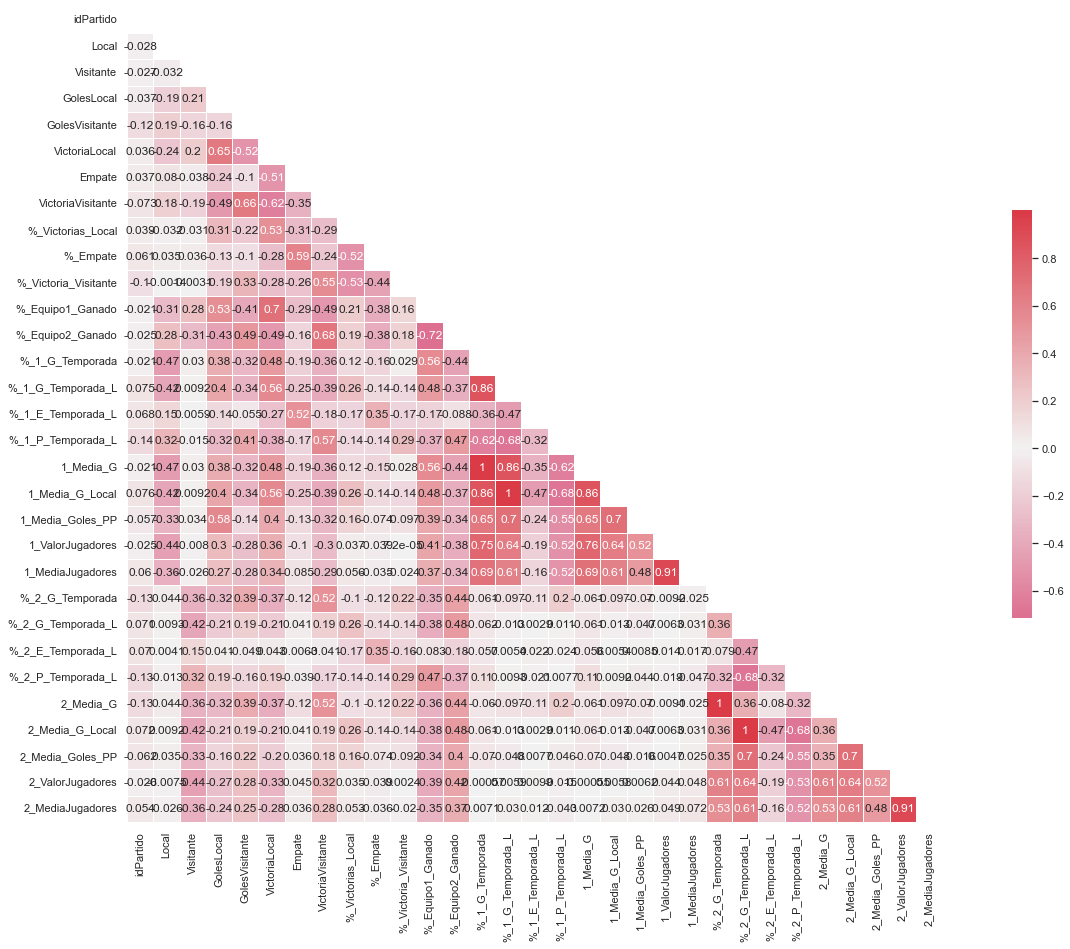

In [12]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()